<h1 align="center">Física Computacional.</h1>
<h1 align="center">Tarea-Practica3</h1>

<h2>Sergio A. Alcalá Corona </h2> 

---
### Rodrigo Vega Vilchis


---
### Resendiz Reyes Pablo Axel

### **EJERCICIOS**:

$\;$

#### **1. Regla del Trapecio**
#### El archivo velocidades.txt (adjunto), contiene dos columnas de numeros, la primera representa el tiempo $t$ en segundos y la segunda la x-velocidad en metros por segundo de una partícula, medida una vez por segundo desde el tiempo $t = 0$ hasta $t = 100$. Las primeras líneas se ven así:

<h5>0 0</h5>
<h5>1 0.069478</h5> 
<h5>2 0.137694</h5> 
<h5>3 0.204332</h5> 
<h5>4 0.269083</h5> 
<h5>5 0.331656</h5>

#### Escrbibe un programa para hacer lo siguiente:

In [1]:
#Antes de empezar con el programa debemos improtar las bibliotecas
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

#### **(a)** Lee los datos y, usando la **regla del trapecio**, calcula a partir de ellos la distancia aproximada recorrida por la partícula en la direccion x como una funcion del tiempo.

In [2]:
#Leemos los datos y los guardamos en 2 listas
t = []
v = []
data = []

buff = open('velocidades.txt','r')

for i in buff:
    data.append(i.split()) #guardamos los datos en buff como pares

#ahora guardamos en cada lista
for k in data:
    t.append(float(k[0]))
    v.append(float(k[1]))
t = np.array(t)
v = np.array(v)

In [3]:
#una ves teniendo ambas listas generaremos el metodo del trapecio
def trap(t,v):
    #generamos nuestros valores iniciales
    N = len(t)
    #como tenemos una funcion con particion homogenea basta escojer h de esta forma
    #h = v[100]-v[0]/len(t)
    #pero como tenemos listas es inecesario
    #valor inicial de la integral
    I = (v[0]+v[100])/2

    # generamos el metodo del trapecio
    for k in range(1,N-1):
        I += v[0 + k]
    return float(I)
    


In [4]:
print('La particula recorre:',trap(t,v),'m')

La particula recorre: 8.218924000000017 m


#### **(b)** Extiende tu programa para hacer una gráfica que muestre, en el mismo gráfico, tanto la curva de velocidad original como la distancia recorrida como una funcion del tiempo.

In [5]:
#una ves teniendo ambas listas generaremos el metodo del trapecio
def trap(t,v):
    #generamos nuestros valores iniciales
    N = len(t)
    #como tenemos una funcion con particion homogenea basta escojer h de esta forma
    #h = v[100]-v[0]/len(t)
    #pero como tenemos listas es inecesario
    #valor inicial de la integral
    I = (v[0]+v[100])/2
    xs = []
    # generamos el metodo del trapecio
    for k in range(1,N-1):
        I += v[0 + k]
        xs.append(I)
    return float(I),xs
    

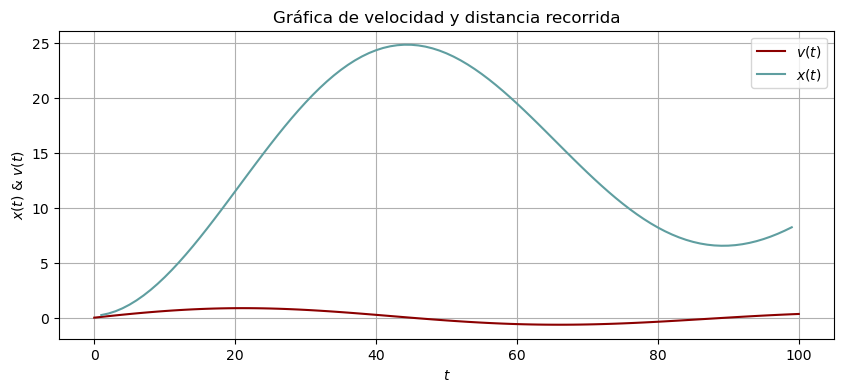

In [6]:
I, xs = trap(t,v)

plt.figure(figsize=(10,4))
plt.plot(t,v,color='darkred',label='$v(t)$')
plt.plot(t[1:100],xs,color='cadetblue',label='$x(t)$')
plt.xlabel(r"$t$")
plt.ylabel(r"$x(t)$ & $v(t)$")
plt.title(r"Gráfica de velocidad y distancia recorrida")
plt.legend()
plt.grid()
plt.show()

#### **2. Integración numérica.**

#### (a) Escribe un programa para calcular un valor aproximado para la integral

<h4 align="center">$\int _{0}^{2}(x^4 -2x +1 ) dx $,</h4

#### utilizando la regla de trapecio y la regla de simpson con 10 divisiones.

In [7]:
#primero empecemos la funcion 
def f1(x):
    return ((x**4) -(2*x) + 1)

#ahora generamos los metodos de integracion


def trap2(f,a,b,N):
    h = (b - a)/N
    I = f(b)/2 + f(a)/2
    

    for k in range(1,N):
        I += f(a + k*h)
    return h*(I)

def simp(f,a,b,N):
    h = (b-a) / N
    I = f(a) + f(b)


    for k in range(1,N): #aqui no separamos con el n/2 porque nuestro codigo ya esta haciendo eso con el if

        if k%2 == 0:
            I += 2*f(a + (k*h))
        else:
            I += 4*f(a + (k*h))
    return (h/3)*I

#metodo del profe
# def IntSimpson(f,a,b,N):

#     s = 0.0
#     h = (b-a)/N

#     s = s + (f(a)+f(b))

#     for k in np.arange(1,N/2+1):
#         s = s + 4*f(a+(2*(k-1))*h)

#     for k in np.arange(1,N/2):
#         s = s + 2*f(a+(2*k*h))
    
#     s = (h/3)*s

#     return float(s)
        
    
def F1(x):
    return (x**5)/5 - (x**2) + x

In [8]:
a = 0
b = 2
#Para este caso usemos N = 10
N = 10
h = (b - a)/N
#print(h)
Int = F1(2) - F1(0)
print('El valor analitico es:',Int)
print('El método de trapecio es:',trap2(f1,a,b,N))
print('El método de Simpson es:',simp(f1,a,b,N))
#print(IntSimpson(f1,a,b,N))

El valor analitico es: 4.4
El método de trapecio es: 4.50656
El método de Simpson es: 4.400426666666667


#### (b) Ejectura el programa y compara tu resultado con el valor correcto de 4.4. ¿Cuál es el error de tu cálculo?

In [9]:
print('El error entre el metodo del Trapecio y el valor analitico es:',abs(Int-trap2(f1,a,b,N)))
print('El error entre el metodo del Simpson y el valor analitico es:',abs(Int-simp(f1,a,b,N)))

El error entre el metodo del Trapecio y el valor analitico es: 0.10655999999999999
El error entre el metodo del Simpson y el valor analitico es: 0.0004266666666667973


#### (c) Modifica el programa para utilizar 100 divisiones y luego 1000. ¿Cómo mejora el resultado?. ¿Cómo se compraran los resultados entre ambas reglas al usar la misma cantidad de divisiones?

In [10]:
M = 100
L = 1000
print('El método de trapecio para N = 100 es:',trap2(f1,a,b,M))
print('El método de Simpson para N = 100 es:',simp(f1,a,b,M))
print('El método de trapecio para N = 1000 es:',trap2(f1,a,b,L))
print('El método de Simpson para N = 1000 es:',simp(f1,a,b,L))

El método de trapecio para N = 100 es: 4.401066656
El método de Simpson para N = 100 es: 4.400000042666667
El método de trapecio para N = 1000 es: 4.400010666665601
El método de Simpson para N = 1000 es: 4.400000000004266


#### Es claro notar que mientras más valores pedimos en la partición, más refinada es y por lo tanto más precisa la integral.

In [11]:
#print(list(range(1,(N/2)+1)))
#esto no tiene nada que ver con el programa, solo era para corroborar

#### **3. El límite de difracción de un telescopio.**

#### Nuestra capacidad para resolver detalles en observaciones astronomicas está limitada por la difraccion de la luz en nuestros telescopios. La luz de las estrellas puede considerarse efectivamente como si proviniera de una fuente puntual en el infinito. Cuando dicha luz, con una longitud de onda $\lambda$, pasa a traves de la apertura circular de un telescopio (que supondremos que tiene un radio unitario) y es enfocada por el telescopio en el plano focal, no produce un solo punto, sino un patron de difracción circular que consta de un punto central rodeado por una serie de anillos concentricos. La intensidad de la luz en este patron de difracción está dada por:

<h4 align="center">$I( r) =\left(\frac{J_{1}( kr)}{kr}\right)^{2}$,</h4>

#### donde $r$ es la distancia en el plano focal desde el centro del patron de difracción, $k =2\pi/\lambda$ y $J_{1}(x)$ es una función de Bessel. Las funciones de Bessel $J_{m}(x)$ estan dadas por:

<h4 align="center">$J_{m}( x) =\frac{1}{\pi }\int _{0}^{\pi }\cos( m\theta -x\sin \theta ) d\theta $,</h4>

#### donde $m$ es un entero no negativo y $x ≥ 0$.

#### **(a)** Escribe una función $J(m,x)$ que calcule el valor de $J_{m}(x)$ usando la regla de Simpson con $N = 1000$ puntos. Utiliza dicha funcion en un programa para graficar, en un solo grafico, las funciones de Bessel $J_0$, $J_1$ y $J_2$ como una funcion de $x$ (de $x = 0$ a $x = 20$).

In [12]:
#hay que definir la funcion con ayuda de nuestra funcion de simpson
# def simp(f,a,b,N):
#     h = (b-a) / N
#     I = f(a) + f(b)


#     for k in range(1,N): #aqui no separamos con el n/2 porque nuestro codigo ya esta haciendo eso con el if

#         if k%2 == 0:
#             I += 2*f(a + (k*h))
#         else:
#             I += 4*f(a + (k*h))
#     return (h/3)*I

#definimos la funcion a integrar 

def J(m,x):
    #definimos la funcion a integrar 
    def j(theta):
        return np.cos(m*theta - x*np.sin(theta))
    #generamos las condiciones de la funcion de bessel
    N = 1000
    a = 0
    b = np.pi
    #metemos nuestra funcion de simpson 
    L = simp(j,a,b,N)
    return (1/np.pi)*L
    
    

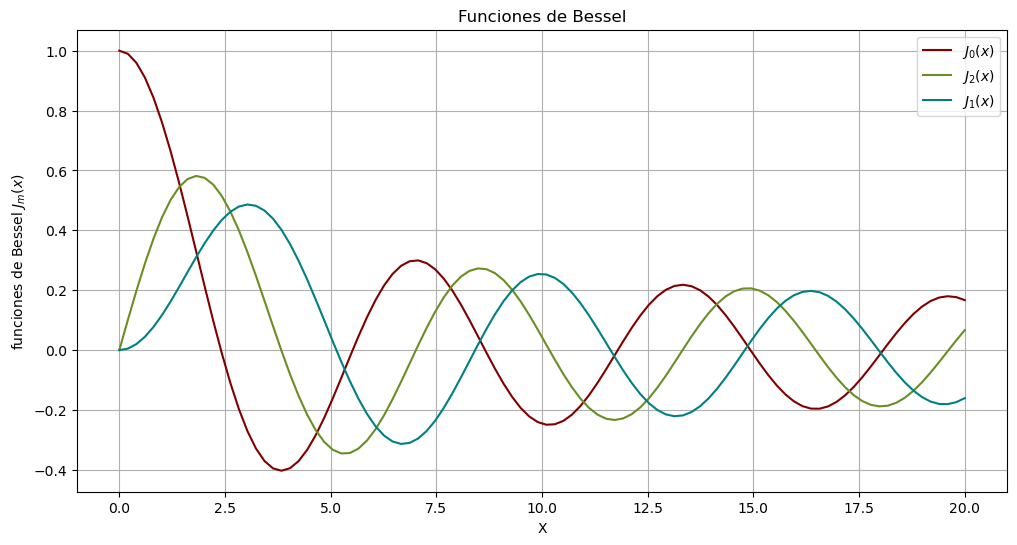

In [13]:
#generamos el intervalo donde se va a mover x
x = np.linspace(0,20,100)

#generamos la grafica
plt.figure(figsize=(12,6))
plt.title('Funciones de Bessel')
plt.plot(x,J(0,x),color='maroon',label='$J_0(x)$')
plt.plot(x,J(1,x),color='olivedrab',label='$J_2(x)$')
plt.plot(x,J(2,x),color='teal',label='$J_1(x)$')
plt.xlabel("X") 
plt.ylabel("funciones de Bessel $J_m(x)$")
#mostramos las etiquetas de las funciones
plt.legend()
plt.grid() #Mostramos la cuadricula 

#### **(b)** Compara tus resultados con los proporcionados con la biblioteca de scipy que implementa la regla de Simpson.

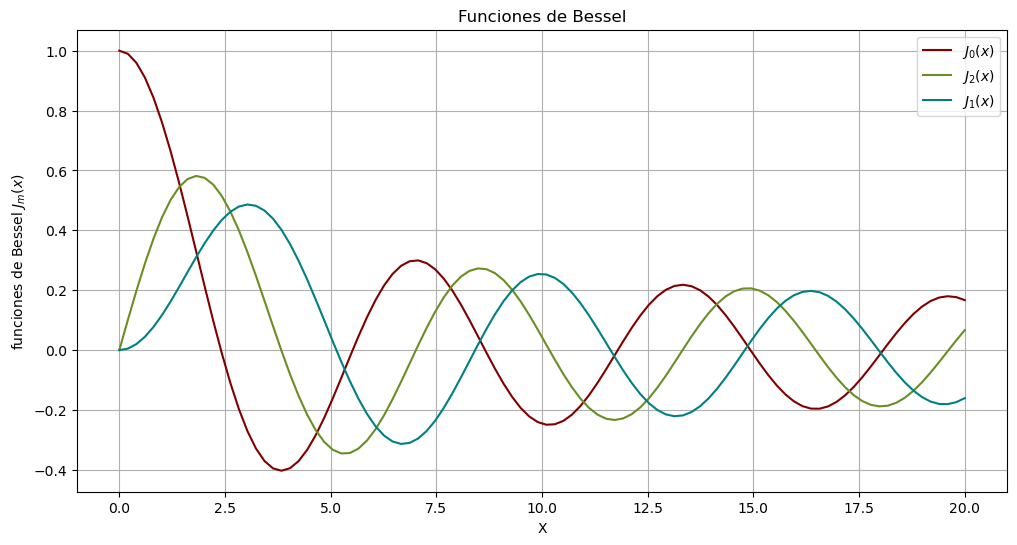

In [14]:
#chale
#investigando encontramos que scipy tiene una funcion de bessel
import scipy.special as sps
x = np.linspace(0,20,100)

#generamos la grafica
plt.figure(figsize=(12,6))
plt.title('Funciones de Bessel')
plt.plot(x,sps.jn(0,x),color='maroon',label='$J_0(x)$')
plt.plot(x,sps.jn(1,x),color='olivedrab',label='$J_2(x)$')
plt.plot(x,sps.jn(2,x),color='teal',label='$J_1(x)$')
plt.xlabel("X") 
plt.ylabel("funciones de Bessel $J_m(x)$")
#mostramos las etiquetas de las funciones
plt.legend()
plt.grid() #Mostramos la cuadricula


#### **(c)** Escribe un segundo programa que haga una grafica de densidad (density plot) de la intensidad del patron de difracción circular de una fuente de luz puntual con $\lambda = 500 nm$, en una region cuadrada del plano focal, usando la fórmula dada anteriormente. 

<h4 align="center">$I( r) =\left(\frac{J_{1}( kr)}{kr}\right)^{2}$,</h4>

#### donde $r$ es la distancia en el plano focal desde el centro del patron de difracción y $k =2\pi/\lambda$ .

#### Su imagen debe cubrir valores de $r$ desde cero hasta aproximadamente $1 \mu m$.

#### Hint 1: Puede resultarte útil saber que $\lim _{x\ \rightarrow 0}\frac{h( x)}{x} =\frac{1}{2}$.

#### Hint 2: El punto central en el patron de difracción es tan brillante que puede resultar difícil ver los anillos que lo rodean en la pantalla de la computadora; para solucionar esta situación puedes usar el esquema “hot” funciona bien. Tu gráfica debería verse algo así:

<div align="center">
    <img src="Problema2.png">
</div>

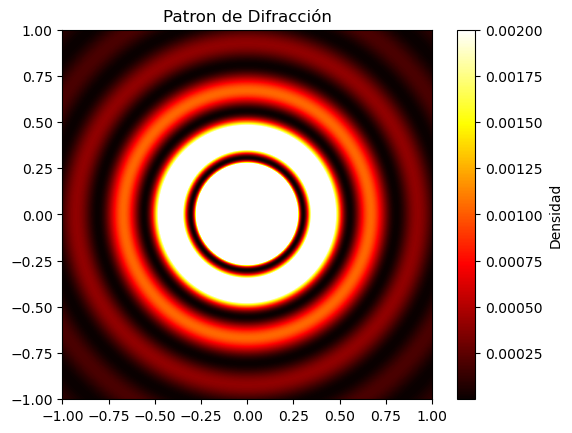

In [15]:
#generamos la malla para el imshow, que debe ser de almenos -1e-6 a 1e-6
x = np.linspace(-1e-6,1e-6,500)
y = np.linspace(-1e-6,1e-6,500)
#comando para la malla
X,Y = np.meshgrid(x,y)
#donde 
r = np.sqrt(X**2 + Y**2)
k = (2*np.pi)/(500e-9)

#llamamos a nuestra funcion de bessel

Intensidad = (J(1,r*k)/(r*k))**2

#Ahora graficamos

plt.title('Patron de Difracción')
plt.imshow(Intensidad, vmax = 0.002, extent=(-1,1,-1,1), cmap='hot')
plt.colorbar(label='Densidad')



#### **4. Capacidad calorífica de un sólido**

#### La teoría de sólidos de Debye dice que la capacidad calorífica de un solido a una temperatura $T$ esta dada por:

<h4 align="center">$C_{V} =9V\rho k_{B}\left(\frac{T}{\theta _{D}}\right)^{3}\int _{0}^{\theta _{D} /T}\frac{x^{4} e^{x}}{\left( e^{x} -1\right)^{2}} dx$,</h4>
       
#### donde $V$ es el volumen del sólido, $\rho$ es la densidad numerica de los átomos, $k_B$ es la constante de Boltzmann y $\theta _D$ es la llamada temperatura de Debye, una propiedad de sólidos que depende de su densidad y la velocidad del sonido.

#### **(a)** Escribe una función $Cv(T)$ que calcule la $C_V$ para un valor dado de temperatura, de una muestra que consta de $1000$ centímetros cúbicos de aluminio sólido, con densidad numérica de $\rho = 6.022 \times 10^{28} m^{−3}$ y una temperatura de Debye de $\theta _D = 428 K$. Utiliza la **cuadratura gaussiana** para evaluar la integral, con $N = 50$ puntos muestra.

In [21]:
#empecemos generando la funcion dentro de la integral y delcarando las constantes que nos da
V = 1e-3 #en metros cubicos 
ro = 6.022e28
t = 428 #temperatura de Debyle
k = 1.38e-23 #cte de Boltzmann
# generamos la funcion:
def Cv(T):
    cons = 9*V*ro*k*(T/t)**3
    N = 50
    a = 0
    b = t/T
    def f(x):
        return ((x**4)*np.exp(x))/(np.exp(x)-1)**2
    
    def cuadratura_gauss(N,a,b): #limites de la integral y cantidad de puntos muestra
        x,w = sp.special.roots_legendre(N)
        return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w
    #generamos los puntos y los pesos estadarizados

    def CuadGauss(N,f,a,b): #empezamos la funcion vista en clase para la cuadratura de gauss con el intervalo xs y los pesos estandarizados
        S = 0
    
        x,w = cuadratura_gauss(N,a,b)
    
        for i in range(N):
            S = S + w[i]*f(x[i])
        
        return S

    #empezamos 
    I = CuadGauss(N,f,a,b)

    return cons*I
    
    
        

In [22]:
print('La Capacidad Calorifica para 300K con una muestra N = 50 pts es:', Cv(300),"J/K")

La Capacidad Calorifica para 300K con una muestra N = 50 pts es: 2256.735984906308 J/K


#### **(b)**  Usa tu función para hacer una gráfica de la capacidad calorífica en funcion de la temperatura desde $T = 5 K$ hasta $T = 500 K$.

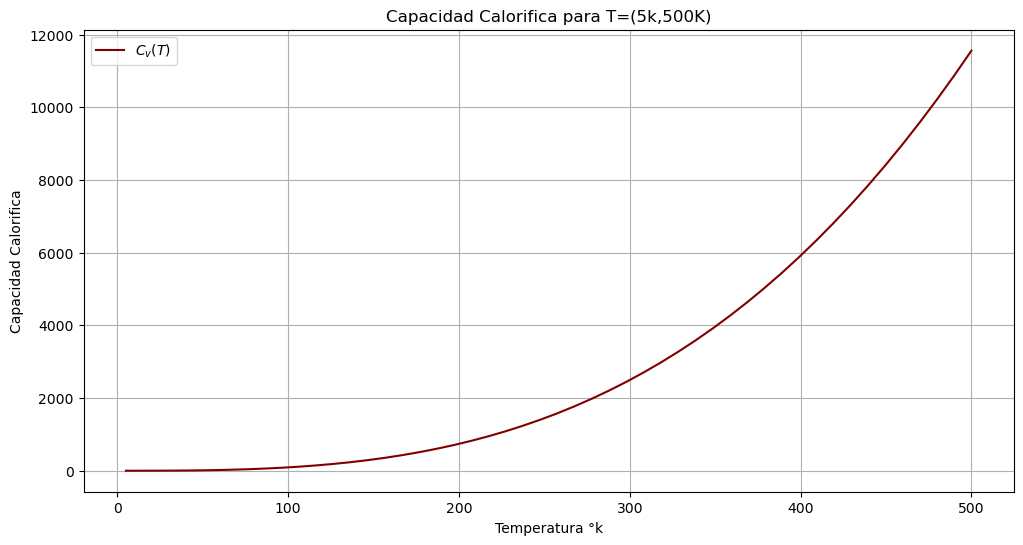

In [18]:
# Generamos nuestra lista
T = np.linspace(5,500)

#generamos la grafica
plt.figure(figsize=(12,6))
plt.title('Capacidad Calorifica para T=(5k,500K)')
plt.plot(T,Cv(T),color='maroon',label='$C_v(T)$')
#plt.plot(x,sps.jn(1,x),color='olivedrab',label='$J_2(x)$')
#plt.plot(x,sps.jn(2,x),color='teal',label='$J_1(x)$')
plt.xlabel("Temperatura °k") 
plt.ylabel("Capacidad Calorifica")
#mostramos las etiquetas de las funciones
plt.legend()
plt.grid() #Mostramos la cuadricula

#### **4. Atracción gravitacional de una lámina uniforme**

#### Una lamina de metal cuadrada uniforme flota inmóvil en el espacio:

<div align="center">
    <img src="Problema4.png">
</div>
       
#### La lamina mide $10 m$ de lado, tiene un espesor insignificante y una masa de $10$ toneladas.

#### **(a)** Considera la fuerza gravitacional debida a la placa que siente una masa puntual de $1 kg$ a una distancia $z$ del centro del cuadrado, en direccion perpendicular a la lamina, como se muestra en la figura. Demuestra que la componente de la fuerza a lo largo del eje $z$ es

<h4 align="center">$F_{z} =G\sigma z\int \int _{-L/2}^{L/2}\frac{dxdy}{\left( x^{2} +y^{2} +z\right)^{3/2}}$,</h4>

#### donde $G = 6.674 \times 10^{-11} m^{3} kg^{−1}s^{−2}$ es la constante gravitacional de Newton y $\sigma$ es la masa por unidad de area de la hoja.

#### Partiendo de que $\displaystyle F=G\frac{m_{1} m_{2}}{r^{3}}\vec{r}$, determinamos $\displaystyle m_{1} =m$ y $\displaystyle m_{2} =dm$ para un diferencial de fuerza $\displaystyle dF$, i.e.

#### $\displaystyle d\vec{F} =\frac{Gmdm}{r^{3}}\vec{r}$, de donde tomando la componente $\displaystyle z$ vendría a ser $\displaystyle dF_{z} =\frac{Gmdm}{r^{3}} z$,

#### pero $\displaystyle \sigma =dm/dxdy\Rightarrow dF_{z} =\frac{Gm\sigma z}{\left( x^{2} +y^{2} +z^{2}\right)^{3/2}} dxdy\Rightarrow F_{z} =G\sigma z\iint _{-L/2}^{L/2}\frac{dxdy}{\left( x^{2} +y^{2} +z^{2}\right)^{3/2}}$.

#### Por lo que queda demostrado.

#### **(b)**  Escribe un programa para calcular y graficar la fuerza en función de $z$ de $z = 0$ hasta $z = 10 m$. Para la integral doble utiliza la cuadratura Gaussiana (doble)

<h4 align="center">$I\simeq \sum _{i=1}^{N}\sum _{j=1}^{N} \omega _{i} \omega _{j} f( x_{i} ,x_{j})$,</h4>

#### con $100$ puntos de muestra a lo largo de cada eje.

In [27]:
#Tenemos que realizar una doble suma, i.e. un doble for iterado 
z = np.linspace(0,10,101) #de cero a 10 con 100 ptos muestra
N = 100
#x, y = np.linspace(-(l/2),l/2,100),np.linspace(-(l/2),l/2,100)
#los limites de x,y son de -L/2=-5m y L/5= 5m


def cuadratura_gauss(N,a,b): #limites de la integral y cantidad de puntos muestra
        x,w = sp.special.roots_legendre(N)
        return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w
    #generamos los puntos y los pesos estadarizados
#reutilizamos la funcion para los pesos

def F(z,N):
    G = 6.674e-11
    sigma = 10
    l = 10
    a = -l/2
    b = l/2
    #aplicamos cuadratura para sacar los pesos para x,y
    x,w = cuadratura_gauss(N,a,b)
    y,v = cuadratura_gauss(N,a,b)
    #tenemos las listas de pesos y los dominios normalizados

    S = 0 #integral
    for i in range(N):
        for j in range(N):
            F = 1/ np.sqrt(x[i]**2 + y[j]**2 + z**2)**3
            S += F * w[i] * v[j]
    Fz = S*G*sigma*z
    return Fz



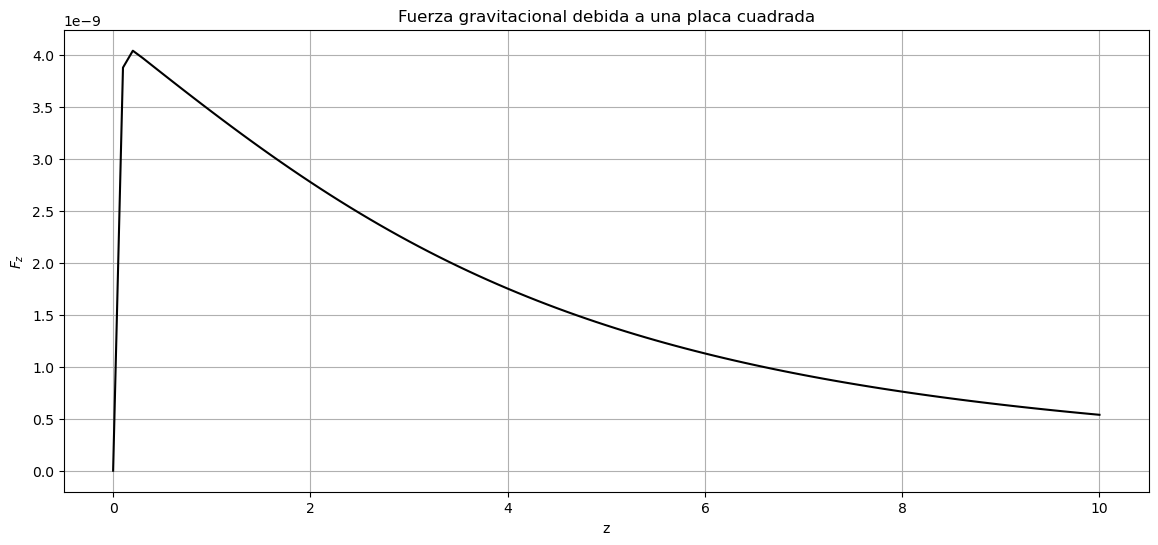

In [32]:
Imz = np.zeros(101)
for i in range(101):
    Imz[i] = F(z[i],N)

plt.figure(figsize=(14,6))
plt.plot(z,Imz,c='black')
plt.xlabel('z')
plt.ylabel('$F_z$')
plt.title("Fuerza gravitacional debida a una placa cuadrada")
plt.grid()
plt.show()

#### **c.** Deberías ver una curva suave, excepto en valores muy pequeños de $z$, donde la fuerzxa deberia caer repentinamente a cero. Esta caída no es un efecto real, sino un artefacto de la forma en que hemos realizado el cálculo. Explica brevemente de dónde viene este artefacto y sugiere una estrategía para eliminarlo, o al menos disminuir su tamaño.


#### Proviende de que a medida que nos acercamos a 0, se da una indeterminacion en la funcion, algo del tipo $0/\infty$, supongo que por el tipo de método numérico usado, esto termina llevando a la caida repentina a cero.

#### Esre cálculo puede considerarse como un modelo de la atracción gravitacional de una galaxia. La mayor parte de la masa de una galaxia espiral (como nuestra Vía Láctea) se encuentra en un p,ano o disco delgado que pasa por el centro galáctico, y la atracción gravitacional ejercida por ese plano sobre cuerpos fuera de la galaxia se puede calcular con los métodos que hemos empleado aquí.

In [13]:
x = np.arange(0,10,2) #arange sirv para la cantidad de saltos
#array([0, 2, 4, 6, 8])
x = np.linspace(0,10,5) #linspace me da la lista con 2 elementos 
#array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])
x

array([ 0. ,  2.5,  5. ,  7.5, 10. ])

<h1 align="center">Diferenciación numérica</h1>

#### **6.** Crea una funcion f(x) que devuelva $1+\frac{1}{2}tanh2x$, luego usa diferencias centrales para calcular numéricamente la derivada de la función en el intervalo $-2<x<2$. 

In [33]:
#generamos la funcion
def f(x):
    return 1 + 0.5*np.tanh(2*x)

#generamos el intervalo -2<x<2
X = np.linspace(-2,2,100)

#generamos la funcion de diferencias centrales
def dc(h,f,x0):
    return (f(x0+(h/2))-f(x0-(h/2)))/h


#### Después, calcula la derivada analíticamente y haz una gráfica con tu resultado numérico y la respuesta analítica. Puede resultar útil graficar la respuesta exacta como líneas y la numérica como puntos. (Hint: usa la función $tanh$ del paquete math.)

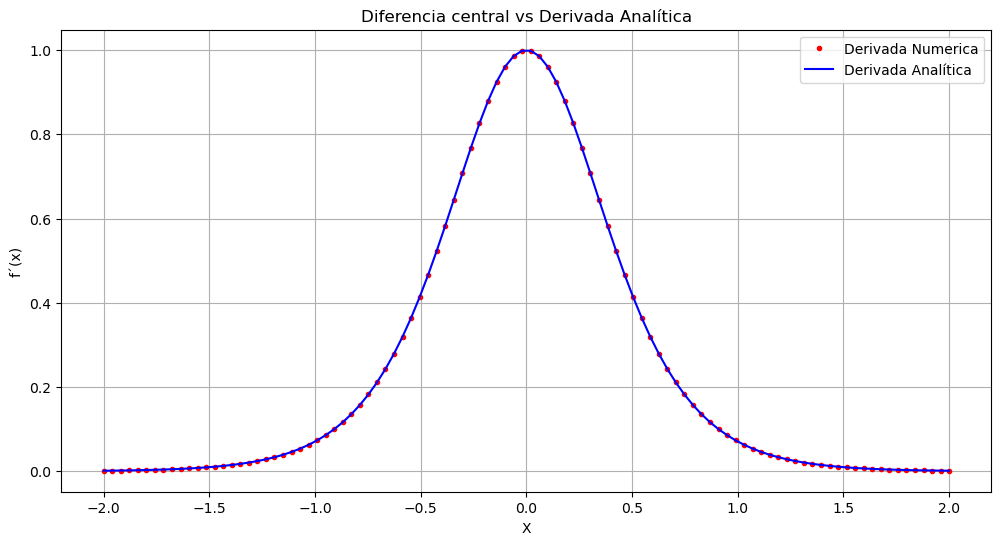

In [34]:
#generamos la funcion derivada de f
def d(x):
    return 1/(np.cosh(2*x))**2

#generamos graficas
plt.figure(figsize=(12,6))
plt.title('Diferencia central vs Derivada Analítica')
plt.plot(X,dc(0.01,f,X),'r.',label='Derivada Numerica')
plt.plot(X,d(X),'b',label='Derivada Analítica')
plt.xlabel("X") 
plt.ylabel("f´(x)")
#mostramos las etiquetas de las funciones
plt.legend()
plt.grid()


#### **7. Campo eléctrico de una distribución de cargas**

#### Supongamos que tenemos una distribución de cargas y queremos calcular el campo eléctrico resultante. Una forma de hacerlo es calcular primero el potencial eléctrico $\phi$ y luego tomar su gradiente.

#### Para una carga puntual $q$ en el origen, el potencial eléctrico a una distancia $r$ del origen es $\phi=q/4\pi \epsilon_0 r$ y el campo eléctrico es $E = -\nabla \phi$.

#### **(a)** Suponiendo que tienes dos cargas, de $+1C$ y $−1C$ (respectivamente), separadas $10 cm$. Calcula el potencial eléctrico resultante en un plano cuadrado de $1 m \times 1 m$ que rodea las cargas y pasa a través de ellas. Calcula el potencial en puntos espaciados a $1 cm$ en una cuadrícula y haz una visualizacion en la pantalla del potencial usando un gráfico de densidad.
<div align="center">
    <img src="Problema7.png">
</div>

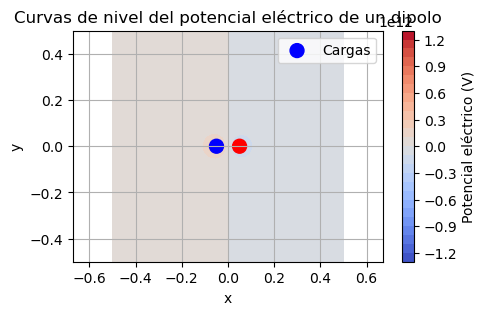

In [77]:
#Ponemos nuestras Constantes 
q1 = 1 #C
q2 = -1
k = 8.98755e9 #1/4pie

#generamos la posicion de las cargas que estaran separadas a 10cm
x1,y1 = -0.05, 0
x2,y2 = 0.05, 0

#generamos los ejes
x = np.linspace(-0.5,0.5,100) #los 100 ptos son por que queremos puntos espaciados por 1cm
y = np.linspace(-0.5,0.5,100)

#generamos nuestra malla de 1mx1m
X,Y = np.meshgrid(x,y)

r1 = np.sqrt( ( (X - x1)**2 ) + ( (Y - y1)**2) ) # Calculamos todas las distancias de los puntos de la cuadrícula a la carga q1
r2 = np.sqrt( ( (X - x2)**2 ) + ( (Y - y2)**2 ) ) # Calculamos todas las distancias de los puntos de la cuadrícula a la carga q2

#ahora teniendo las distancias de cada punto de la cuadricula generamos la funcion de potencial para cada punto 
V = (q1/r1 + q2/r2)*k

# Graficamos
# Graficar curvas de nivel
plt.figure(figsize=(5, 3))
contours = plt.contourf(X, Y, V, levels=25, cmap='coolwarm')
plt.colorbar(label='Potencial eléctrico (V)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Curvas de nivel del potencial eléctrico de un dipolo')
plt.scatter([-0.05, 0.05], [0, 0], c=['blue', 'red'], s=100, label='Cargas')
plt.legend()
plt.grid()
plt.axis('equal')
plt.show()


#### **(b)** Ahora calcula las derivadas parciales del potencial con respecto a $x$ y $y$, para encontrar el campo electrico en el plano $xy$ y realiza una visualizacion de dicho campo.

#### Lo anterior es un poco mas complicado que visualizar el potencial, porque el campo eléctrico tiene **magnitud y dirección**. Una forma de hacerlo podría ser hacer dos gráficos de densidad, uno para la magnitud y otro para la dirección, este último usando el esquema de color “$hsv$” en $pylab$, que es un esquema de arcoíris que pasa por todos los colores pero comienza y termina con el mismo tono de rojo, lo que lo hace adecuado para representar cosas como direcciones o ángulos que dan la vuelta al círculo completo y terminan donde comenzaron. Una visualizacion más sofisticada podría usar el objeto de flecha del paquete $visual$, dibujando una cuadrícula de flechas con la direccion y la longitud elegidas para representar el campo.

Text(0.5, 1.0, 'Campo eléctrico, y líneas equipotenciales, con cargas equidistantes $C$ y $-C$')

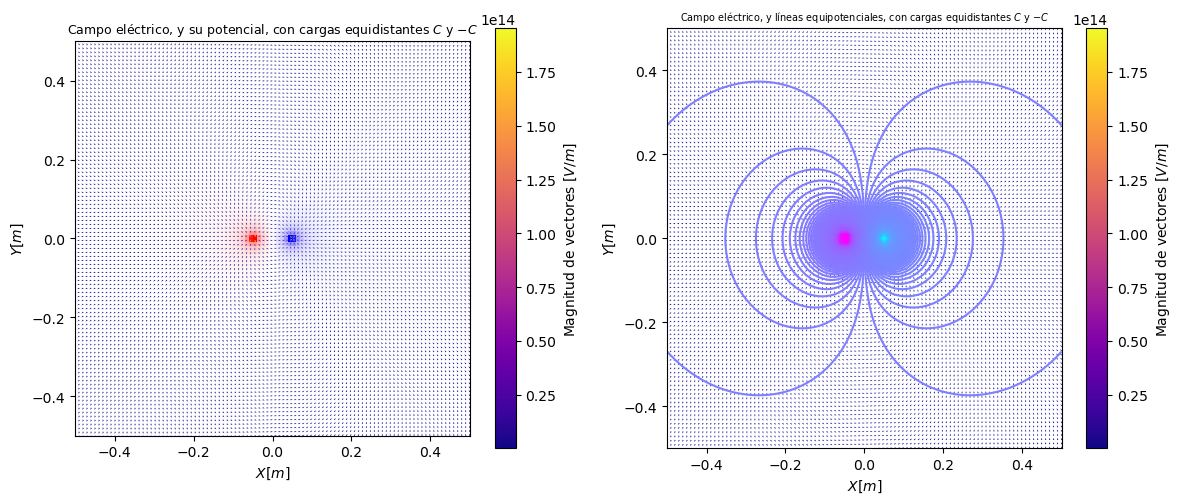

In [39]:
import numpy as np
import matplotlib.pyplot as plt

k = 8.98755e9 # Definimos todas las constantes que necesitaremos
q1 = 1
q2 = -1
x1, y1 = -0.05, 0 # Definimos la posición de la carga C
x2, y2 = 0.05, 0 # Definimos la posición de la carga -C

dom_x = np.linspace(-0.5, 0.5, 100) # Creamos un array del dominio en X
dom_y = np.linspace(-0.5, 0.5, 100) # Creamos un array del dominio en Y
X, Y = np.meshgrid(dom_x, dom_y) # Creamos la cuadrícula del dominio en XY

r1 = np.sqrt( ( (X - x1)**2 ) + ( (Y - y1)**2) ) # Calculamos todas las distancias de los puntos de la cuadrícula a la carga q1
r2 = np.sqrt( ( (X - x2)**2 ) + ( (Y - y2)**2 ) ) # Calculamos todas las distancias de los puntos de la cuadrícula a la carga q2

V = k * (q1 / r1 + q2 / r2) # Calculamos el potencial en todos los puntos de la cuadrícula

lineas_equipotenciales = np.linspace(V.min(),V.max(),500) # Creamos un array que contiene 5000 las líneas equipotenciales

def ParcialX(f,x_0,y_0,h): # Definimos la derivada parcial respecto de X
    return ( f( x_0 + h/2 ,y_0) - f( x_0 - h/2 ,y_0) ) / h
def ParcialY(f,x_0,y_0,h): # Definimos la derivada parcial respecto de Y
    return ( f(x_0, y_0+ h/2 ) - f(x_0, y_0 - h/2 ) ) / h
def menosV(x,y): # Definimos la función del potencial para x e y dados
    return (-k) * (q1 / ( np.sqrt( ( (x - x1)**2 ) + ( (y - y1)**2) ) ) + q2 / ( np.sqrt( ( (x - x2)**2 ) + ( (y - y2)**2 ) ) ) )

E_x = ParcialX(menosV,X,Y,1e-5) # Calculamos la componente en x del campo eléctrico
E_y = ParcialY(menosV,X,Y,1e-5) # Calculamos la componente en y del campo eléctrico

Norma = np.sqrt( (E_x)**2 + (E_y)**2 ) # Calculamos la norma de cada vector

# Normarlizamos los vectores
E_xN = E_x / Norma
E_yN = E_y / Norma

plt.figure(figsize=(14,12)) # Creamos la gráfica con los requisitos personales que se deseen

plt.subplot(221) # Creamos una versión de la gráfica que grafica tanto el campo escalar del potencial como el campo vectorial del campo eléctrico
plt.imshow(V,cmap="bwr",extent=[-0.5, 0.5, -0.5, 0.5])
plt.quiver(X,Y,E_xN,E_yN,Norma,cmap="plasma")
plt.xlabel(r"$X [m]$")
plt.ylabel(r"$Y [m]$")
plt.colorbar(label="Magnitud de vectores $[V/m]$")
plt.title(r"Campo eléctrico, y su potencial, con cargas equidistantes $C$ y $-C$",fontsize=9)
# Se ve todo lleno de vectores azules debido a que la magnitud de los vectores cae rápidamente a medida que se alejan de las partículas cargadas,
# provocando que estás sean, en magntitud, mucho más pequeñas que las cercanas a las cargas

plt.subplot(222) # Creamos una versión de la gráfica que grafica tanto las líneas equipotenciales como el campo vectorial del campo eléctrico
plt.quiver(X,Y,E_xN,E_yN,Norma,cmap="plasma")
plt.colorbar(label="Magnitud de vectores $[V/m]$")
plt.contour(X,Y,V,levels=lineas_equipotenciales,cmap="cool",extent=[-0.5, 0.5, -0.5, 0.5])
plt.xlabel(r"$X [m]$")
plt.ylabel(r"$Y [m]$")
plt.title(r"Campo eléctrico, y líneas equipotenciales, con cargas equidistantes $C$ y $-C$",fontsize=7)
# Este gráfico es creado con el propósito de verificar que esté bien hecho el campo eléctrico, pues los vectores de éste deberían de ser siempre
# ortogonales a las líneas equipotenciales

#### **(c)** Ahora supongamos que tenemos una distribución continua de carga sobre un cuadrado de $L \times L$. La densidad de carga en $\frac{C}{m^2}$ es:

<h4 align="center">$\sigma ( x,y) =q_{0}\sin\frac{2\pi x}{L}\sin\frac{2\pi y}{L}$.</h4>

#### Calcula y visualiza el campo eléctrico resultante en puntos espaciados a $1 cm$ en $1$ metro cuadrado del plano $xy$ para el caso donde $L = 10 cm$. La distribución de carga está centrada en el medio del área visualizada y $q_0 = 100 \frac{C}{m^2}$

#### Tendras que realizar una integral doble sobre $x$ y $y$, luego diferenciar el potencial respecto a la posición para obtener el campo eléctrico. Elige cualquier método de integración que parezca apropiado para las integrales.

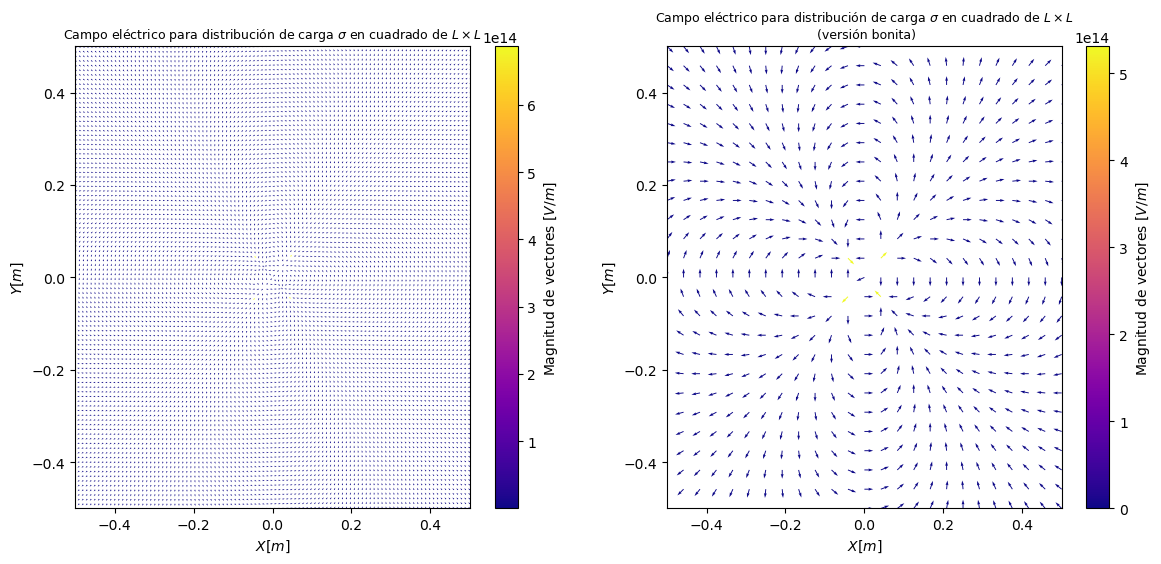

In [41]:
k = 8.98755e9
q0 = 100
L = 0.1

def Vpot(X,Y,N):
    def sigma(x,y,X,Y):
        return ( q0 * np.sin(2 * np.pi * x / L) * np.sin(2 * np.pi * y / L) ) / np.sqrt( (x-X)**2 + (y-Y)**2)
    x, wx = np.polynomial.legendre.leggauss(N)
    y, wy = np.polynomial.legendre.leggauss(N)
    x = x * L/2
    wx = wx * L/2
    y = y * L/2
    wy = wy * L/2
    I = 0
    for i in range(N):
        for j in range(N):
            I += sigma(x[i],y[j],X,Y) * wx[i] * wy[j]
    return k * I

def ParcialX_V(f,x_0,y_0,h,N): # Definimos la derivada parcial respecto de X
    return ( f( x_0 + h/2 ,y_0,N) - f( x_0 - h/2 ,y_0,N) ) / h
def ParcialY_V(f,x_0,y_0,h,N): # Definimos la derivada parcial respecto de Y
    return ( f(x_0, y_0+ h/2 ,N) - f(x_0, y_0 - h/2 ,N) ) / h

dom_x = np.linspace(-0.5, 0.5, 100) # Creamos un array del dominio en X
dom_y = np.linspace(-0.5, 0.5, 100) # Creamos un array del dominio en Y
X, Y = np.meshgrid(dom_x, dom_y) # Creamos la cuadrícula del dominio en XY

E_x = (-1)*ParcialX_V(Vpot,X,Y,1e-5,100) # Calculamos la componente en x del campo eléctrico
E_y = (-1)*ParcialY_V(Vpot,X,Y,1e-5,100) # Calculamos la componente en y del campo eléctrico

Norma = np.sqrt( (E_x)**2 + (E_y)**2 ) # Calculamos la norma de cada vector

# Normarlizamos los vectores
E_xN = E_x / Norma
E_yN = E_y / Norma

############################################################################################
# Estos array de abajo son iguales que los de arriba, sólo que con menos puntos en la grilla
dom_xc = np.linspace(-0.5, 0.5, 25)
dom_yc = np.linspace(-0.5, 0.5, 25)
Xc, Yc = np.meshgrid(dom_xc, dom_yc)
E_xc = (-1)*ParcialX_V(Vpot,Xc,Yc,1e-5,100)
E_yc = (-1)*ParcialY_V(Vpot,Xc,Yc,1e-5,100)
Normac = np.sqrt( (E_xc)**2 + (E_yc)**2 )
E_xNc = E_xc / Normac
E_yNc = E_yc / Normac
############################################################################################

plt.figure(figsize=(14,6)) # Creamos la gráfica con los requisitos personales que se deseen

plt.subplot(121) # Creamos una versión de la gráfica del campo vectorial del campo eléctrico tal y como es pedido
plt.quiver(X,Y,E_xN,E_yN,Norma,cmap="plasma")
plt.xlabel(r"$X [m]$")
plt.ylabel(r"$Y [m]$")
plt.xlim(-0.5,0.5)
plt.ylim(-0.5,0.5)
plt.colorbar(label="Magnitud de vectores $[V/m]$")
plt.title(r"Campo eléctrico para distribución de carga $\sigma$ en cuadrado de $L\times L$",fontsize=9)
############################################################################################
# La gráfica inferior es creada con el propósito de mostrar una versión más "bonita" del campo vectorial solicitado, pues si éste se realiza
# con la cantidad de puntos solicitados en la grilla, entonces sale una cosa... algo fea, por lo que la gráfica inferior usa una menor cantidad de
# puntos con el propósito antes dicho
plt.subplot(122)
plt.quiver(Xc,Yc,E_xNc,E_yNc,Normac,cmap="plasma")
plt.xlabel(r"$X [m]$")
plt.ylabel(r"$Y [m]$")
plt.xlim(-0.5,0.5)
plt.ylim(-0.5,0.5)
plt.colorbar(label="Magnitud de vectores $[V/m]$")
plt.title(r"Campo eléctrico para distribución de carga $\sigma$ en cuadrado de $L\times L$""\n (versión bonita)",fontsize=9)

############################################################################################

plt.show()

#### **8. Procesamiento de imágenes y $STM$**

#### Cuando la luz incide sobre una superficie, la cantidad que cae por unidad de área depende no solo de la intensidad de la luz, sino también del ángulo de incidencia. Si la luz forma un angulo $\theta$ con la normal, sólo “ve” una fracción $\cos \theta$ de área, por unidad de área real en la superficie:

<div align="center">
    <img src="Problema8.png">
</div>

#### Así, la intensidad de la iluminación es $a \cos \theta$, si $a$ es la intensidad bruta de la luz. Esta simple ley física es un elemento central de los gráficos por computadora en 3D. Nos permite calcular cómo incide la luz sobre objetos tridimensionales y, por tanto, cómo se verán cuando se iluminen desde varios ángulos.

#### Supongamos, por ejemplo, que miramos la Tierra desde arriba y vemos sus montanas. Conocemos la altura de las montanas $w(x, y)$ en función de la posición en el plano, por lo que la ecuación para la superficie de la Tierra es simplemente $z = w(x, y)$, o equivalentemente $w(x, y) − z = 0$, y el vector normal $\vec{v}$ a la superficie está dado por el gradiente de $w(x, y) − z$ de la siguiente manera:

<h4 align="center">$\vec{v} =\nabla [ w( x,y) -z] =\begin{pmatrix}
\partial /\partial x\\
\partial /\partial y\\
\partial /\partial z
\end{pmatrix}[ w( x,y) -z] =\begin{pmatrix}
\partial w/\partial x\\
\partial w/\partial y\\
-1
\end{pmatrix}$,</h4>

#### Ahora supongamos que tenemos luz entrante representada por un vector $\vec{a}$ con magnitud igual a la intensidad de la luz. Entonces el producto escalar de los vectores $\vec{a}$ y $\vec{v}$ es:

<h4 align="center">$\vec{a} \cdot \vec{v} =| \vec{a}| | \vec{v}| \cos \theta $,</h4>

#### donde $\theta$ es el ángulo entre los vectores.

#### Entonces, la intensidad de la iluminación de la superficie de las montañas es:

<h4 align="center">$I=| \vec{a}| \cos \theta =\frac{\vec{a} \cdot \vec{v}}{| \vec{v}| } =\frac{a_{x}( \partial w/\partial x) +a_{y}( \partial w/\partial y) -a_{z}}{\sqrt{( \partial w/\partial x)^{2} +( \partial w/\partial y)^{2} +1}}$.</h4>

#### Tomemos un caso simple donde la luz brilla horizontalmente con intensidad unitaria, a lo largo de una línea en un ángulo $\phi$ en sentido contrario a las manecillas del reloj desde el eje este-oeste, de modo que $\vec{a} = (\cos \phi, \sin \phi, 0)$. Entonces nuestra intensidad de iluminacion se simplifica a:

<h4 align="center">$I=\frac{\cos \phi ( \partial w/\partial x) +\sin \phi ( \partial w/\partial y)}{\sqrt{( \partial w/\partial x)^{2} +( \partial w/\partial y)^{2} +1}}$.</h4>

#### Así, si podemos calcular las derivadas de la altura $w(x, y)$ y sabemos $\phi$, entonces podemos calcular la intensidad en cualquier punto.

#### **(a)** El archivo adjunto $altitudes.txt$, contiene la altitud $w(x, y)$ en metros sobre el nivel del mar (o profundidad bajo el nivel del mar) de la superficie de la Tierra, medida en una cuadrícula de puntos $(x, y)$. Escribe un programa que lea este archivo y almacene los datos en una matriz. Luego calcula las derivadas $\partial w/\partial x$ y $\partial w/\partial y$ en cada punto de la cuadrícula. Explica que método utilizaste para calcularlos y por qué. (Hint: probablemente tendrás que usar más de un método para obtener cada punto de la cuadrícula porque suceden cosas incomodas en los bordes de la misma). Para calcular las derivadas, necesitaras saber el valor de $h$ y la distancia en metros entre puntos de la cuadrícula, que es de aproximadamente $30, 000 m$ en este caso.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def derivar_cuadricula(datos,h):
    nx, ny = datos.shape
    Dx = np.zeros((nx, ny))
    Dy = np.zeros((nx, ny))

    Dx[1:-1, 1:-1] = (datos[2:, 1:-1] - datos[:-2, 1:-1]) / (2 * h) # Derivamos centralmente para los puntos interiores
    Dy[1:-1, 1:-1] = (datos[1:-1, 2:] - datos[1:-1, :-2]) / (2 * h)

    Dx[:, 0] = (datos[:, 1] - datos[:, 0]) / h  # Derivamos hacia la derecha el borde izquierdo
    Dx[:, -1] = (datos[:, -1] - datos[:, -2]) / h # Derivamos hacia la izquierda el borde derecho 
    Dx[0, :] = (datos[1, :] - datos[0, :]) / h  # Derivamos hacia la derecha el borde superior
    Dx[-1, :] = (datos[-1, :] - datos[-2, :]) / h # Derivamos hacia la izquierda el borde inferior

    Dy[:, 0] = (datos[:, 1] - datos[:, 0]) / h  # Derivamos hacia la derecha el borde izquierdo
    Dy[:, -1] = (datos[:, -1] - datos[:, -2]) / h # Derivamos hacia la izquierda el borde derecho
    Dy[0, :] = (datos[1, :] - datos[0, :]) / h  # Derivamos hacia la derecha el borde superior
    Dy[-1, :] = (datos[-1, :] - datos[-2, :]) / h # Derivamos hacia la izquierda el borde inferior

    # Las direcciones de las derivadas son para tomar los puntos "interiores" más pegados a los bordes (pero sin repetir los valores derivados de éstos)
    # de la cuadrícula, y que así no haya porblemas "incomodos" como se menciona
    
    return Dx, Dy

datos = np.loadtxt("altitudes.txt")  # Cargamos los datos

Dx,Dy = derivar_cuadricula(datos,30000) # Calcula las derivadas para el valor de h dado

print("Derivadas en x:\n", Dx) # Imprimos ambas matrices para comprobar que fueron bien calculadas
print("\nDerivadas en y:\n", Dy)

#### **(b)** Ahora, usando tus valores para las derivadas, calcula la intensidad para cada punto de la cuadrícula, con $\phi = 45^{o}$, y haz un gráfico de densidad de los valores resultantes en el que el brillo de cada punto depende de la correspondiente valor de intensidad. Si lo haces funcionar correctamente, la grafica debería verse como un mapa en relieve del mundo; deberías poder ver los continentes y las cadenas montañosas en 3D. (Algunos de los problemas comunes al hacer esto, pueden ser: un mapa que esta al revés o de lado, o un mapa en el que el relieve que está “de adentro hacia afuera”, lo que significa que las regiones altas se ven bajas y *viceversa*. Trabaja con los detalles de tu programa hasta que obtengas un mapa que te parezca adecuado.) Hint: Ten en cuenta que el valor de la intensidad $I$ de la formula anterior puede ser positivo o negativo; oscila entre $+1$ y $−1$. ¿Que significa una intensidad negativa? Significa que el área en cuestión está en sombras (es decir, que se encuentra en el lado equivocado de la montaña para recibir alguna luz). Podrías representar esto coloreando esas areas del mapa completamente de negro, aunque en la practica obtendrás una imagen más bonita (aunque tal vez menos realista) simplemente usando una gama continua de grises desde $+1$ hasta $−1$.

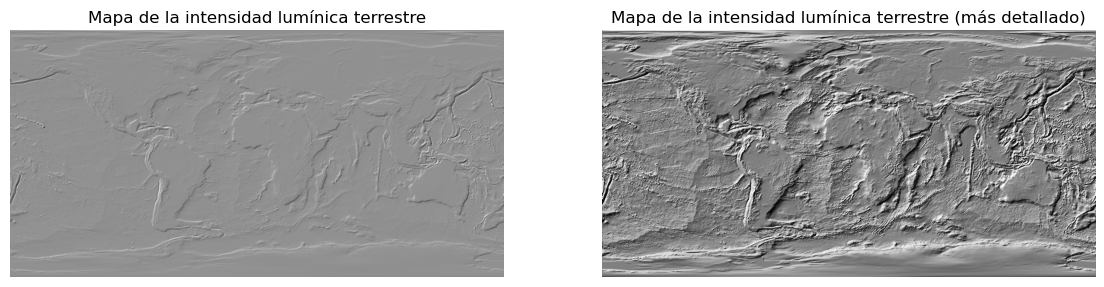

In [44]:
def derivar_cuadricula(datos,h):
    nx, ny = datos.shape
    Dx = np.zeros((nx, ny))
    Dy = np.zeros((nx, ny))

    Dx[1:-1, 1:-1] = (datos[2:, 1:-1] - datos[:-2, 1:-1]) / (2 * h) # Derivamos centralmente para los puntos interiores
    Dy[1:-1, 1:-1] = (datos[1:-1, 2:] - datos[1:-1, :-2]) / (2 * h)

    Dx[:, 0] = (datos[:, 1] - datos[:, 0]) / h  # Derivamos hacia la derecha el borde izquierdo
    Dx[:, -1] = (datos[:, -1] - datos[:, -2]) / h # Derivamos hacia la izquierda el borde derecho 
    Dx[0, :] = (datos[1, :] - datos[0, :]) / h  # Derivamos hacia la derecha el borde superior
    Dx[-1, :] = (datos[-1, :] - datos[-2, :]) / h # Derivamos hacia la izquierda el borde inferior

    Dy[:, 0] = (datos[:, 1] - datos[:, 0]) / h  # Derivamos hacia la derecha el borde izquierdo
    Dy[:, -1] = (datos[:, -1] - datos[:, -2]) / h # Derivamos hacia la izquierda el borde derecho
    Dy[0, :] = (datos[1, :] - datos[0, :]) / h  # Derivamos hacia la derecha el borde superior
    Dy[-1, :] = (datos[-1, :] - datos[-2, :]) / h # Derivamos hacia la izquierda el borde inferior

    # Las direcciones de las derivadas son para tomar los puntos "interiores" más pegados a los bordes (pero sin repetir los valores derivados de éstos)
    # de la cuadrícula, y que así no haya porblemas "incomodos" como se menciona
    
    return Dx, Dy

def I_int(Dx,Dy,phi): # Definimos la función que calcule la intensidad de la luz
    num = np.cos(phi) * Dx + np.sin(phi) * Dy
    den = np.sqrt(Dx**2 + Dy**2 + 1)
    I = num / den
    return I

datos = np.loadtxt("altitudes.txt")  # Cargamos los datos

Dx,Dy = derivar_cuadricula(datos,30000) # Calculamos las derivadas para el valor de h dado
Dx_bonito,Dy_bonito = derivar_cuadricula(datos,300) # Calculamos las derivadas para un valor de h en el que encontre que se ve mejor la gráfica

I = I_int(Dx,Dy, np.pi / 4 ) # Calculamos la intensidad lumínica para el valor dado de phi y la h dada
I_bonito = I_int(Dx_bonito,Dy_bonito, np.pi / 4 ) # Calculamos la intensidad lumínica para el valor dado de phi y la "h bonita"

plt.figure(figsize=(14, 6)) # Creamos la gráfica con los requisitos personales que se deseen

plt.subplot(121) # Graficamos para el h dado
plt.imshow(I,cmap='gray')
plt.title("Mapa de la intensidad lumínica terrestre")
plt.axis("off")

plt.subplot(122) # Graficamos para un h más bonito según yo
plt.imshow(I_bonito,cmap='gray')
plt.title("Mapa de la intensidad lumínica terrestre (más detallado)")
plt.axis("off")

plt.show()

#### **(c)** El otro archivo adjunto llamado $stm.txt$, contiene una cuadrícula con valores de mediciones de un microscopio de efecto túnel (*scanning tunneling microscope* o **STM**) de la superficie (111) del silicio. Un microscopio de efecto túnel (*STM*) es un dispositivo que mide la forma de superficies a nivel atómico siguiendo una punta afilada sobre la superficie y midiendo la *corriente de efecto tínel cuántico* en función de la posición. El resultado final es una cuadrícula de valores que representan la altura de la superficie en función de la posición y los datos del archivo $stm.txt$ contienen precisamente esa rejilla de valores. Modifica tu programa anterior para visualizar los datos STM y así crear una imagen 3D de cómo se ve la superficie de silicio. El valor de $h$ para las derivadas en este caso es de alrededor de $h = 2.5$ (en unidades arbitrarias).

(np.float64(-0.5), np.float64(675.5), np.float64(662.5), np.float64(-0.5))

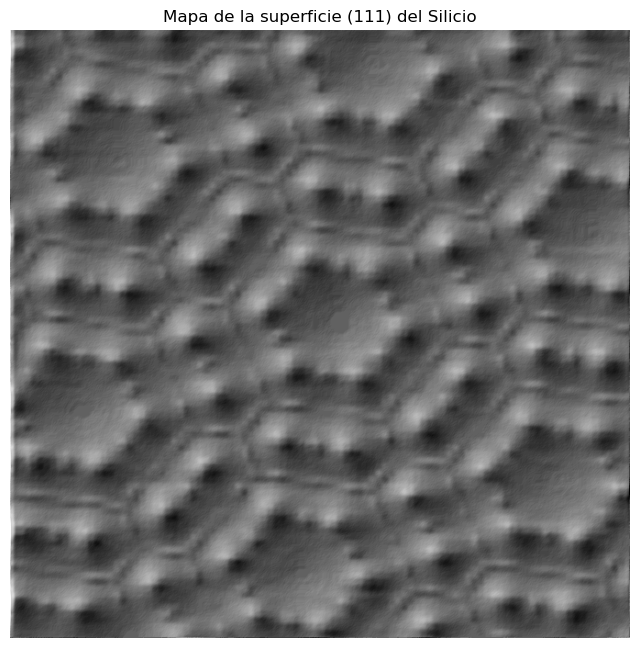

In [45]:
import numpy as np
import matplotlib.pyplot as plt

def derivar_cuadricula(datos,h):
    nx, ny = datos.shape
    Dx = np.zeros((nx, ny))
    Dy = np.zeros((nx, ny))

    Dx[1:-1, 1:-1] = (datos[2:, 1:-1] - datos[:-2, 1:-1]) / (2 * h) # Derivamos centralmente para los puntos interiores
    Dy[1:-1, 1:-1] = (datos[1:-1, 2:] - datos[1:-1, :-2]) / (2 * h)

    Dx[:, 0] = (datos[:, 1] - datos[:, 0]) / h  # Derivamos hacia la derecha el borde izquierdo
    Dx[:, -1] = (datos[:, -1] - datos[:, -2]) / h # Derivamos hacia la izquierda el borde derecho 
    Dx[0, :] = (datos[1, :] - datos[0, :]) / h  # Derivamos hacia la derecha el borde superior
    Dx[-1, :] = (datos[-1, :] - datos[-2, :]) / h # Derivamos hacia la izquierda el borde inferior

    Dy[:, 0] = (datos[:, 1] - datos[:, 0]) / h  # Derivamos hacia la derecha el borde izquierdo
    Dy[:, -1] = (datos[:, -1] - datos[:, -2]) / h # Derivamos hacia la izquierda el borde derecho
    Dy[0, :] = (datos[1, :] - datos[0, :]) / h  # Derivamos hacia la derecha el borde superior
    Dy[-1, :] = (datos[-1, :] - datos[-2, :]) / h # Derivamos hacia la izquierda el borde inferior

    # Las direcciones de las derivadas son para tomar los puntos "interiores" más pegados a los bordes (pero sin repetir los valores derivados de éstos)
    # de la cuadrícula, y que así no haya porblemas "incomodos" como se menciona
    
    return Dx, Dy

def I_int(Dx,Dy,phi): # Definimos la función que calcule la intensidad de la luz
    num = np.cos(phi) * Dx + np.sin(phi) * Dy
    den = np.sqrt(Dx**2 + Dy**2 + 1)
    I = num / den
    return I

datos = np.loadtxt("stm.txt")  # Cargamos los datos

Dx,Dy = derivar_cuadricula(datos,2.5) # Calculamos las derivadas para el valor de h dado

I = I_int(Dx,Dy, np.pi / 4 ) # Calculamos la intensidad lumínica para el valor dado de phi

plt.figure(figsize=(8,8)) # Creamos la gráfica con los requisitos personales que se deseen
plt.imshow(I,cmap="gray")
plt.title("Mapa de la superficie (111) del Silicio")
plt.axis("off")